In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import random
from collections import Counter
import numpy as np
from itertools import cycle, islice

# Tempel

**tempel_limpio.dat**: DR12 SDSS sample of galaxies

    - galID   :ID galaxia (SDSS)
    - ra[rad] :Asención recta
    - dec[rad]:Declinacion
    - zCMB   :Galaxy redshift corrected to the CMB rest-frame.
    - rextAB :r-band observer-frame model apparent magnitud corrected for galactic extinction in AB system.
    - gextAB :g-band observer-frame model apparent magnitud corrected for galactic extinction in AB system.
    - rabs :r-band k-corrected absolute magnitude.
    - gabs :g-band k-corrected absolute magnitude.
    - Menv :absolute magntude "r", Menv= mlim - 25 -5*log(ld) -kr, (mlim=17.77) .


In [2]:
path_gal_gru = '../../catalogos/tempel_limpio.dat'


df = pd.read_table(path_gal_gru, sep="\s+", names=['galID', 'ra_rad', 'dec_rad', 'zCMB', 'rextAB', 'gextAB'])
#, 'rabs', 'gabs', 'Menv'
display(df.shape)
display(df.head(2))

(557559, 6)

,galID,ra_rad,dec_rad,zCMB,rextAB,gextAB
0,1237667108498440262,2.130366,0.285695,0.101670,14.571712,15.594273
1,1237667108498440277,2.129668,0.285548,0.101815,17.194962,18.246586


In [3]:
df.describe()

,galID,ra_rad,dec_rad,zCMB,rextAB,gextAB
count,5.575590e+05,557559.000000,557559.000000,557559.000000,557559.000000,557559.000000
mean,1.237662e+18,3.243881,0.472808,0.098996,16.841969,17.538159
std,5.656351e+12,0.660586,0.311077,0.044951,0.795484,32.870037
min,1.237649e+18,1.915685,-0.065414,0.000146,9.446938,-9999.215704
25%,1.237658e+18,2.713526,0.212609,0.065501,16.508394,17.265486
50%,1.237662e+18,3.237212,0.452644,0.095587,17.071351,17.846251
75%,1.237666e+18,3.799847,0.707482,0.132439,17.416182,18.237686
max,1.237675e+18,4.570260,1.226423,0.199999,17.767403,20.485298


In [4]:
import math
pi = math.pi
plt.scatter(df.ra_rad*180/pi, df.dec_rad*180/pi, s= 0.0001)
plt.xlabel('ra')
plt.ylabel('dec')

Text(0, 0.5, 'dec')

In [5]:
plt.hist(df.zCMB, 200)

(array([  14.,   55.,  195.,  318.,  461.,  535.,  596.,  540.,  468.,
         391.,  363.,  490.,  393.,  493.,  657.,  713.,  804.,  706.,
         740.,  773.,  898., 1503., 2053., 2454., 2419., 2209., 2172.,
        2214., 2368., 2788., 2777., 2960., 2719., 2895., 2943., 2867.,
        2664., 2564., 2385., 2390., 2432., 2597., 2496., 2632., 2659.,
        3126., 3381., 3284., 2856., 2958., 3103., 3267., 3492., 3424.,
        3379., 3331., 2967., 2833., 2732., 2943., 3335., 3731., 3897.,
        4262., 4568., 4307., 4209., 4171., 4148., 4227., 4531., 4823.,
        5216., 5068., 5088., 5068., 5314., 4958., 5084., 5072., 4901.,
        5193., 5276., 5071., 4961., 4991., 4624., 4649., 4433., 4275.,
        3938., 3739., 3742., 4036., 3960., 4088., 3955., 4024., 3694.,
        3701., 3719., 3779., 3858., 3931., 3962., 3757., 3771., 3968.,
        3919., 3830., 3608., 3969., 4072., 4231., 4214., 4146., 4202.,
        4049., 3863., 3891., 3661., 3451., 3338., 3408., 3495., 3367.,
      

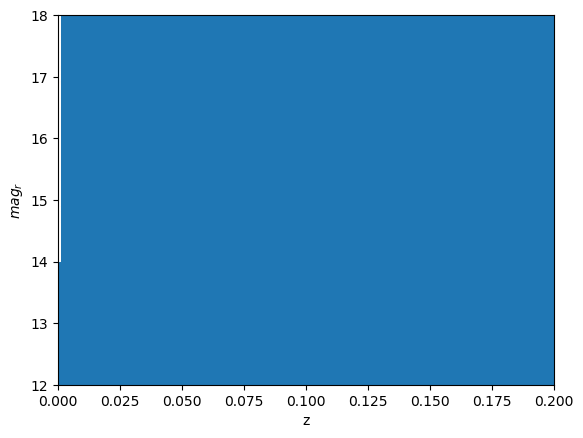

In [6]:
plt.scatter(df.zCMB, df.rextAB, s= 0.0001)
plt.xlabel('z')
plt.ylabel(r'$mag_r$')
plt.xlim(0,0.2)
plt.ylim(12,18)
plt.show()

In [7]:
df1 = df[df['gextAB'] > 17]
display(df1.shape)
df1.head(2)

(457212, 6)

,galID,ra_rad,dec_rad,zCMB,rextAB,gextAB
1,1237667108498440277,2.129668,0.285548,0.101815,17.194962,18.246586
2,1237667142858899877,2.129055,0.286631,0.102300,17.104173,18.041415


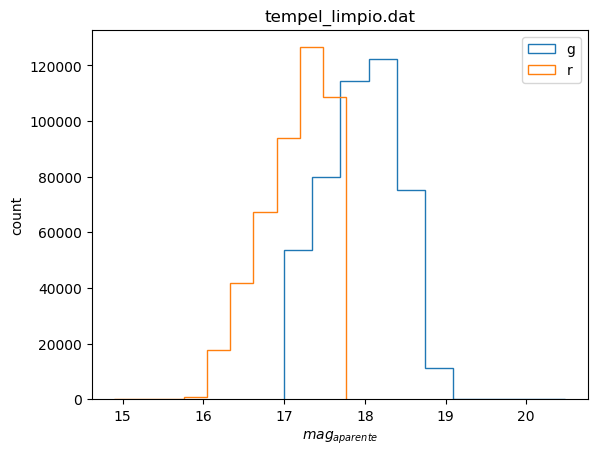

In [8]:
plt.hist(df1.gextAB, histtype='step', label='g')
plt.hist(df1.rextAB, histtype='step', label='r')
plt.ylabel('count')
plt.xlabel(r'$mag_{aparente}$')
plt.title('tempel_limpio.dat')
plt.legend()
plt.show()

## Color aparente g-r

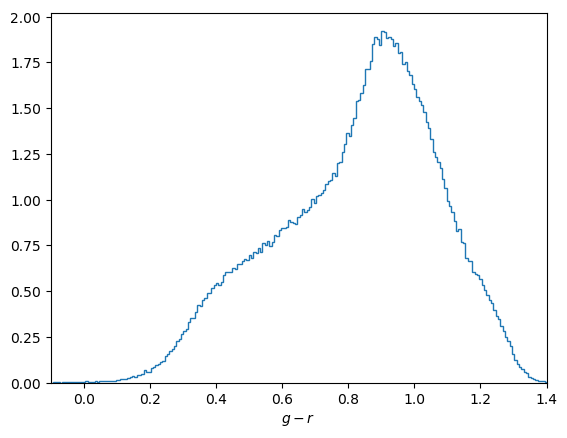

In [9]:
g_r = df1.gextAB - df1.rextAB
plt.hist(g_r, 500, histtype='step', density=True)
plt.xlim(-0.1, 1.4)
plt.xlabel(r'$g-r$')
plt.show()

# **Correcion K**

In [10]:
dfk = pd.read_table("../../tempel_kcorr.dat", sep="\s+", names=['z', 'mr', 'kr', 'mg', 'kg'])
#dfk = pd.read_table("tempel_kcorr.dat", sep="\s+", names=['z', 'kr'])

In [11]:
dfk.head(3)

,z,mr,kr,mg,kg
0,0.101670,-22.276813,0.098686,-21.434483,0.278915
1,0.101815,-19.659205,0.100937,-18.791185,0.284542
2,0.102300,-19.750313,0.089993,-18.979822,0.256742


In [12]:
display(min(dfk.z), max(dfk.z))
display(min(dfk.kr), max(dfk.kr))
display(min(dfk.mr), max(dfk.mr))
display(min(dfk.mg), max(dfk.mg))

0.00014648100500000002

0.199999213

-3.15560985

332892701000.0

-332892701000.0

-4.93149757

-908355437000.0

-3.53374171

In [13]:
indx = np.where((dfk.mr > -27.) & (dfk.mr < -15.) & (dfk.mg > -27.) & (dfk.mg < -15.) & (dfk.kr > -1.5) & (dfk.kg > -1.5))
np.shape(indx)

(1, 554244)

In [14]:
zz=dfk.z.values[indx]
r=dfk.mr.values[indx]
g=dfk.mg.values[indx]
kkr=dfk.kr.values[indx]
kkg=dfk.kg.values[indx]

display(min(zz), max(zz))
display(min(r), max(r))
display(min(g), max(g))
display(min(kkr), max(kkr))
display(min(kkg), max(kkg))

0.000884581998

0.199999213

-24.0188217

-15.0554066

-25.050826999999998

-15.0009041

-0.73712033

0.7639860509999999

-1.49980819

2.22657728

In [15]:
display(kkr)
display(zz)

array([0.09868575, 0.10093706, 0.08999259, ..., 0.14366303, 0.02931623,
       0.02586553])

array([0.10166964, 0.10181501, 0.10229951, ..., 0.1342077 , 0.03032968,
       0.02527587])

In [16]:
kkr.shape

(554244,)

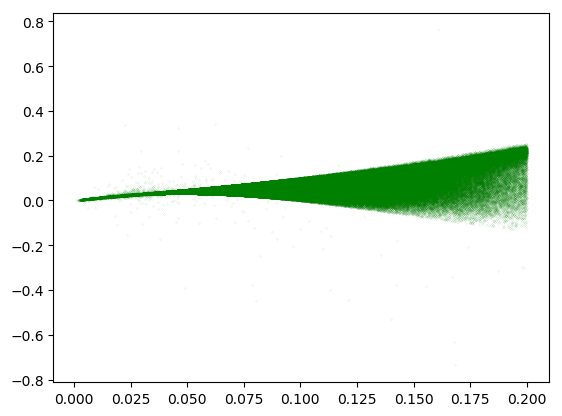

In [17]:
plt.plot(zz,kkr, 'g.',linestyle='None', markersize=0.10)
plt.show()

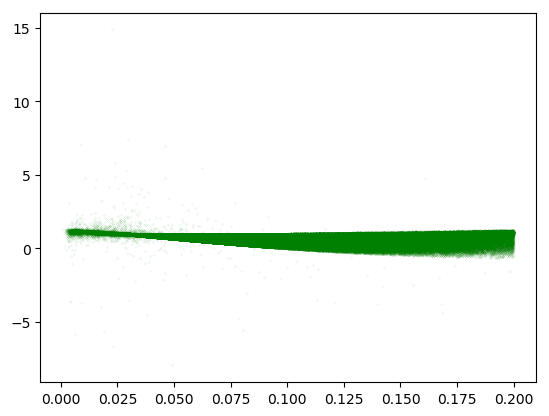

In [18]:
plt.plot(zz,kkr/zz, 'g.',linestyle='None', markersize=0.1)
plt.show()

In [19]:
ic1 = np.where(((g-r) > 0.0) & ((g-r)<= 0.4))
ic2 = np.where(((g-r) > 0.4) & ((g-r)<= 0.6))
ic3 = np.where(((g-r) > 0.6) & ((g-r)<= 0.7))
ic4 = np.where(((g-r) > 0.7) & ((g-r)<= 0.8))
ic5 = np.where(((g-r) > 0.8) & ((g-r)<= 1.0))
np.shape(ic1),np.shape(ic2),np.shape(ic3),np.shape(ic4),np.shape(ic5)


((1, 31834), (1, 128327), (1, 94285), (1, 196013), (1, 102904))

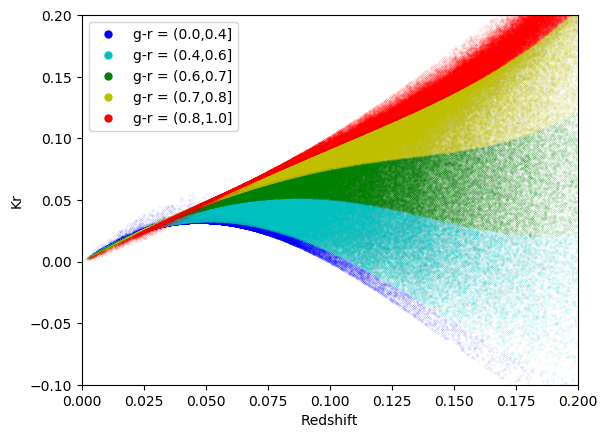

In [20]:
fig, ax = plt.subplots()
ax.plot(zz[ic1], kkr[ic1], 'b.', markersize=0.1,label='g-r = (0.0,0.4]') #,linestyle='None'
ax.plot(zz[ic2], kkr[ic2], 'c.', markersize=0.1,label='g-r = (0.4,0.6]')
ax.plot(zz[ic3], kkr[ic3], 'g.', markersize=0.1,label='g-r = (0.6,0.7]')
ax.plot(zz[ic4], kkr[ic4], 'y.', markersize=0.1,label='g-r = (0.7,0.8]')
ax.plot(zz[ic5], kkr[ic5], 'r.', markersize=0.1,label='g-r = (0.8,1.0]')

ax.set_xlim(0,0.2)
ax.set_ylim(-0.1,0.2)

ax.set_xlabel('Redshift')
ax.set_ylabel('Kr')
ax.legend(loc='upper left', markerscale=100., scatterpoints=2, fontsize=10)
plt.show()
#fig.savefig('test_kcorr.eps', format='eps')

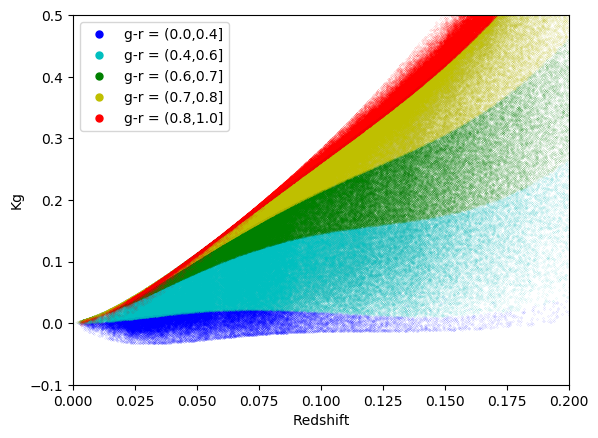

In [21]:
fig, ax = plt.subplots()
ax.plot(zz[ic1], kkg[ic1], 'b.',linestyle='None', markersize=0.1,label='g-r = (0.0,0.4]')
ax.plot(zz[ic2], kkg[ic2], 'c.',linestyle='None', markersize=0.1,label='g-r = (0.4,0.6]')
ax.plot(zz[ic3], kkg[ic3], 'g.',linestyle='None', markersize=0.1,label='g-r = (0.6,0.7]')
ax.plot(zz[ic4], kkg[ic4], 'y.',linestyle='None', markersize=0.1,label='g-r = (0.7,0.8]')
ax.plot(zz[ic5], kkg[ic5], 'r.',linestyle='None', markersize=0.1,label='g-r = (0.8,1.0]')

ax.set_xlim(0,0.2)
ax.set_ylim(-0.1,0.5)

ax.set_xlabel('Redshift')
ax.set_ylabel('Kg')
ax.legend(loc='upper left', markerscale=100., scatterpoints=2, fontsize=10)
plt.show()

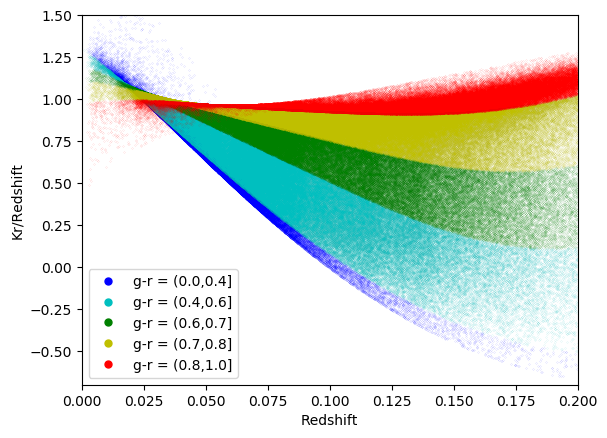

In [22]:
fig, ax = plt.subplots()
ax.plot(zz[ic1], kkr[ic1]/zz[ic1], 'b.',linestyle='None', markersize=0.1,label='g-r = (0.0,0.4]')
ax.plot(zz[ic2], kkr[ic2]/zz[ic2], 'c.',linestyle='None', markersize=0.1,label='g-r = (0.4,0.6]')
ax.plot(zz[ic3], kkr[ic3]/zz[ic3], 'g.',linestyle='None', markersize=0.1,label='g-r = (0.6,0.7]')
ax.plot(zz[ic4], kkr[ic4]/zz[ic4], 'y.',linestyle='None', markersize=0.1,label='g-r = (0.7,0.8]')
ax.plot(zz[ic5], kkr[ic5]/zz[ic5], 'r.',linestyle='None', markersize=0.1,label='g-r = (0.8,1.0]')
ax.set_xlim(0,0.2)
ax.set_ylim(-0.7,1.5)
ax.set_xlabel('Redshift')
ax.set_ylabel('Kr/Redshift')

plt.legend()
ax.legend(loc='lower left', markerscale=100., scatterpoints=2, fontsize=10)
plt.show()

# Color g-r (Mabs)

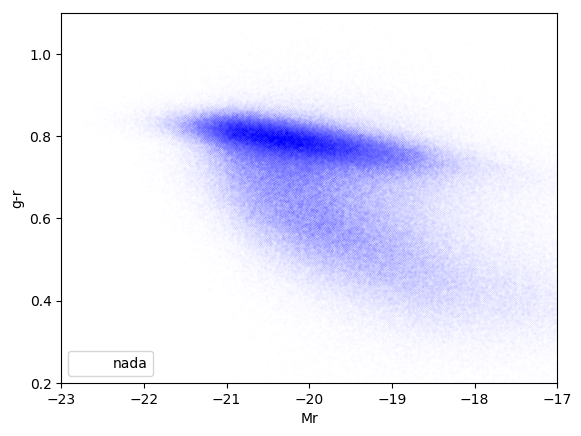

In [23]:
fig, ax = plt.subplots()
#ax.plot(r[ic1], g[ic1] - r[ic1], 'b.',linestyle='None', markersize=0.1,label='(0.0,0.4]')
#ax.plot(r[ic2], g[ic2] - r[ic2], 'c.',linestyle='None', markersize=0.1,label='(0.4,0.6]')
#ax.plot(r[ic3], g[ic3] - r[ic3], 'g.',linestyle='None', markersize=0.1,label='(0.6,0.7]')
#ax.plot(r[ic4], g[ic4] - r[ic4], 'y.',linestyle='None', markersize=0.1,label='(0.7,0.8]')
#ax.plot(r[ic5], g[ic5] - r[ic5], 'r.',linestyle='None', markersize=0.1,label='(0.8,1.0]')
ax.plot(r, g - r, 'b.',linestyle='None', markersize=0.01,label='nada')
ax.set_ylim(0.2,1.1)
ax.set_xlim(-23,-17)
ax.set_xlabel('Mr')
ax.set_ylabel('g-r')

ax.legend(loc='lower left')
plt.show()

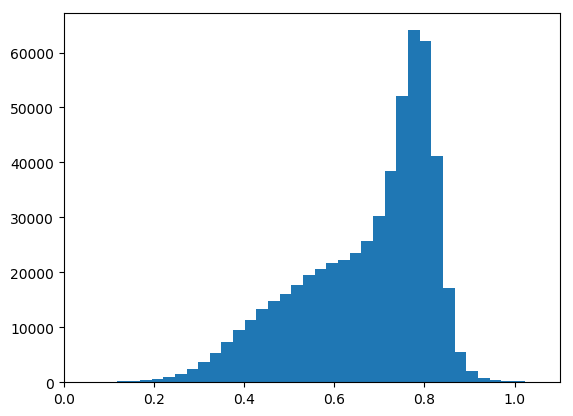

In [24]:
fig, ax = plt.subplots()
ax.hist(g - r, 200)
ax.set_xlim(0,1.1)
plt.show()

In [25]:
np.shape(g - r),min(g-r),max(g-r)

((554244,), -2.054002699999998, 3.1161861)

In [26]:
color=g - r
c1=np.where((r >= -23.) & (r < -22.))

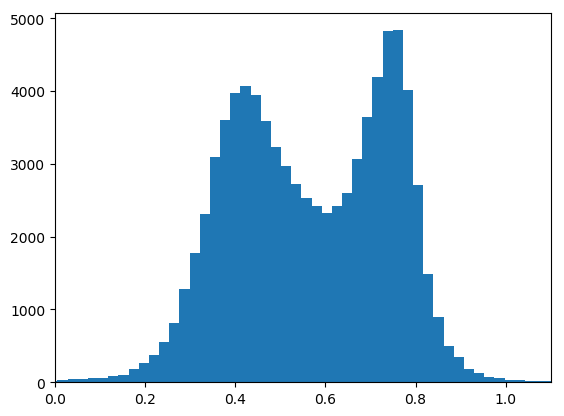

In [27]:
iz = np.where((zz>0.0) & (zz<0.05))
fig, ax = plt.subplots()
ax.hist(g[iz] - r[iz], 200)
ax.set_xlim(0,1.1)
plt.show()

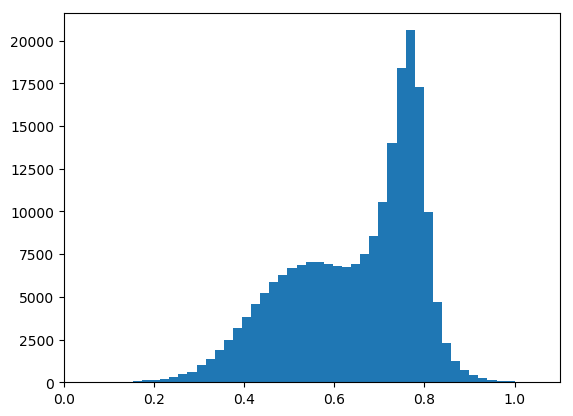

In [28]:
iz = np.where((zz>0.05) & (zz<0.1))
fig, ax = plt.subplots()
ax.hist(g[iz] - r[iz], 200)
ax.set_xlim(0,1.1)
plt.show()

## GaussianMixture

In [29]:
xx=np.arange(-22.5,-17,0.4)
xx

array([-22.5, -22.1, -21.7, -21.3, -20.9, -20.5, -20.1, -19.7, -19.3,
       -18.9, -18.5, -18.1, -17.7, -17.3])

(12822,)

(12822, 1)

array([[0.74000105],
       [0.82362567]])

<bound method BaseMixture.score_samples of GaussianMixture(n_components=2, random_state=0)>

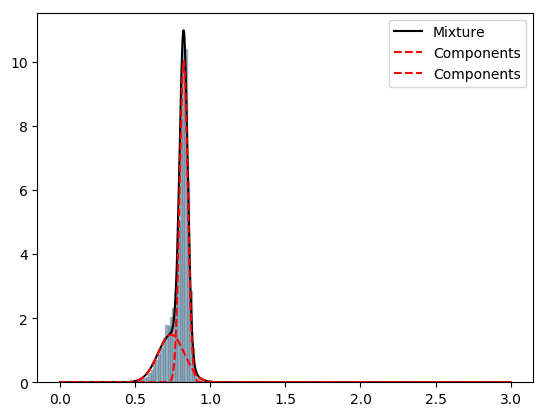

In [30]:
from sklearn.mixture import GaussianMixture
import scipy.stats as stats
for i in range(2,3):
    icol = np.where((r >= xx[i]) & (r < xx[i+1])) 
    col = color[icol]
    display(np.shape(col)) 
    col = col.reshape(-1, 1)
    display(np.shape(col))    
    gm = GaussianMixture(n_components=2, random_state=0).fit(col)
    display(gm.means_)
    weights = gm.weights_
    means = gm.means_
    covars = gm.covariances_
    plt.hist(col, bins=100, histtype='bar', density=True, ec='grey', alpha=0.5)
    #plt.plot(col,weights[0]*stats.norm.pdf(col,means[0],np.sqrt(covars[0])))
    #plt.rcParams['agg.path.chunksize'] = 10000
    x_range = np.linspace(0, 3, 1000)
    pdf = np.exp(gm.score_samples(x_range.reshape(-1, 1)))
    responsibilities = gm.predict_proba(x_range.reshape(-1, 1))
    pdf_individual = responsibilities * pdf[:, np.newaxis]
    plt.plot(x_range, pdf, '-k', label='Mixture')
    plt.plot(x_range, pdf_individual, '--r', label='Components')
    plt.legend()
    display(gm.score_samples)
    plt.show()
    

## Clean data

In [31]:
display('Valores faltantes',dfk.notnull().all().to_frame())
display('Estadísticos del dataset',dfk.z.describe())
display('Estadísticos del dataset',dfk.mr.describe())
display('Estadísticos del dataset',dfk.kr.describe())
display('Estadísticos del dataset',dfk.mg.describe())
display('Estadísticos del dataset',dfk.kg.describe())

'Valores faltantes'

,0
z,True
mr,True
kr,True
mg,True
kg,True


'Estadísticos del dataset'

count    557559.000000
mean          0.098996
std           0.044951
min           0.000146
25%           0.065501
50%           0.095587
75%           0.132439
max           0.199999
Name: z, dtype: float64

'Estadísticos del dataset'

count    5.575590e+05
mean    -2.651042e+06
std      8.417056e+08
min     -3.328927e+11
25%     -2.045130e+01
50%     -1.981330e+01
75%     -1.901346e+01
max     -4.931498e+00
Name: mr, dtype: float64

'Estadísticos del dataset'

count    5.575590e+05
mean     2.651022e+06
std      8.417056e+08
min     -3.155610e+00
25%      3.640345e-02
50%      6.309211e-02
75%      9.859951e-02
max      3.328927e+11
Name: kr, dtype: float64

'Estadísticos del dataset'

count    5.575590e+05
mean    -7.799936e+06
std      2.449440e+09
min     -9.083554e+11
25%     -1.972260e+01
50%     -1.912604e+01
75%     -1.838291e+01
max     -3.533742e+00
Name: mg, dtype: float64

'Estadísticos del dataset'

count    5.575590e+05
mean     7.799917e+06
std      2.449440e+09
min     -7.531041e+00
25%      8.317843e-02
50%      1.786035e-01
75%      2.983748e-01
max      9.083554e+11
Name: kg, dtype: float64

In [32]:
#Valores duplicados
dfk[dfk.duplicated()].sort_values(['z'])

,z,mr,kr,mg,kg


In [33]:
#dfk['mr'] = dfk['mr'].astype(float, errors = 'raise')

In [34]:
#dfk[dfk.kg.str.contains('*************')]

In [35]:
#df_raro = dfk[dfk.kr == '*************']

In [36]:
#df_raro

In [37]:
#dfk.kr.hist()

In [38]:
dfk.select_dtypes(['float']).columns
dfk.select_dtypes(['string']).columns
dfk.select_dtypes(['object']).columns

Index([], dtype='object')

In [39]:
#dfk.iloc[dfk.z.dtypes == np.float64, :]

In [40]:
is_NaN = dfk.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = dfk[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [z, mr, kr, mg, kg]
Index: []


In [41]:
dfna= dfk[dfk['mr'].isna()]

In [42]:
dfna.shape

(0, 5)

In [43]:
#dfk2=dfk.fillna(-999)
#df. dropna() 

In [44]:
cdf = dfk[~dfk.applymap(np.isreal).all(1)]

In [45]:
display(cdf.min())
display(cdf.max())

z    NaN
mr   NaN
kr   NaN
mg   NaN
kg   NaN
dtype: float64

z    NaN
mr   NaN
kr   NaN
mg   NaN
kg   NaN
dtype: float64

In [46]:
#cdf.mr.hist()

In [47]:
cdf.shape

(0, 5)

In [48]:
bfk = dfk[dfk.applymap(np.isreal).all(1)]

In [49]:
bfk.head(10)

,z,mr,kr,mg,kg
0,0.101670,-22.276813,0.098686,-21.434483,0.278915
1,0.101815,-19.659205,0.100937,-18.791185,0.284542
2,0.102300,-19.750313,0.089993,-18.979822,0.256742
3,0.101155,-19.512510,0.097668,-18.675480,0.275955
4,0.099765,-19.248039,0.086424,-18.488312,0.245368
5,0.102289,-19.235596,0.072540,-18.550776,0.209318
6,0.101835,-19.211760,0.093626,-18.414736,0.266024
7,0.122311,-22.563314,0.079985,-21.869993,0.249018
8,0.122099,-20.112492,0.125892,-19.225374,0.363065
9,0.120275,-18.006388,-1.748281,-12.547960,-4.613689


In [50]:
bfk.shape


(557559, 5)

In [51]:
bfk.mr.dtype

dtype('float64')

In [52]:
bfk['mr'] = bfk['mr'].astype(float, errors = 'raise')

In [53]:
bfk['mr'].dtype

dtype('float64')